In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
mpl.style.use('bmh')

In [2]:
from lint_analysis.bin_counts import cache

In [12]:
import numpy as np
import math

def multiples(tokens, cols=5):
    
    # Get row count and figure size.
    rows = math.ceil(len(tokens) / cols)
    
    # Make the figure + axes.
    plt.figure(figsize=(cols*4, rows*4))
    
    for i, token in enumerate(tokens):
        
        # Select the axis for the next plot.
        ax = plt.subplot2grid((rows, cols), (math.floor(i/cols), i%cols))
        
        # Configure axes.
        ax.set_title(token, fontsize=12)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
        ax.tick_params(labelsize=8)
    
        series = cache.token_series(token)

        ax.hist(
            np.arange(len(series)),
            weights=series,
            bins=len(series),
            zorder=3,
        )

    plt.tight_layout(h_pad=1)
    plt.show()

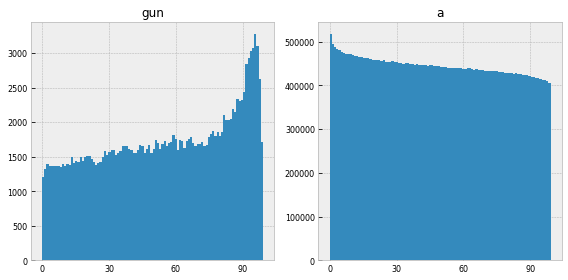

In [13]:
multiples(['gun', 'a'], cols=2)

In [14]:
def plot_tokens(tokens, title=None, w=8, h=8):
    
    plt.figure(figsize=(w, h))
    
    lines = []
    for token, pos in tokens:
        series = cache.token_series(token, pos=pos)
        line, = plt.plot(series / series.sum(), label=f'{token} ({pos})')
        lines.append(line)
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
    
    if title:
        plt.title(title)
    
    plt.xlabel('Narrative time')
    plt.ylabel('Relative frequency')
    plt.show()

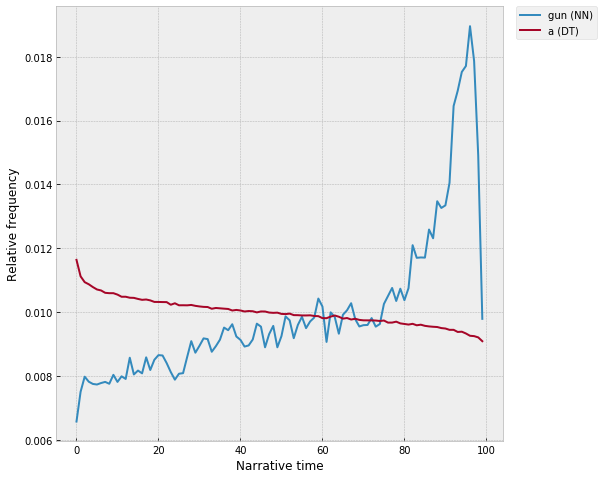

In [15]:
plot_tokens([('gun', 'NN'), ('a', 'DT')])

In [16]:
import math
import numpy as np

def plot_token(token, pos, w=8, h=8):
    
    series = cache.token_series(token, pos=pos)
    
    n = series.sum()
    p = 1 / len(series)
    
    mean = n * p
    var = mean * (1-p)
    std = math.sqrt(var)

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [mean, mean], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        mean + 2*std,
        mean - 2*std,
        color='black',
        alpha=0.1,
    )
    
    plt.title(f'{token} ({pos})')
    plt.xlabel('Narrative time')
    plt.xlabel('Word count')
    plt.plot(series)
    plt.show()

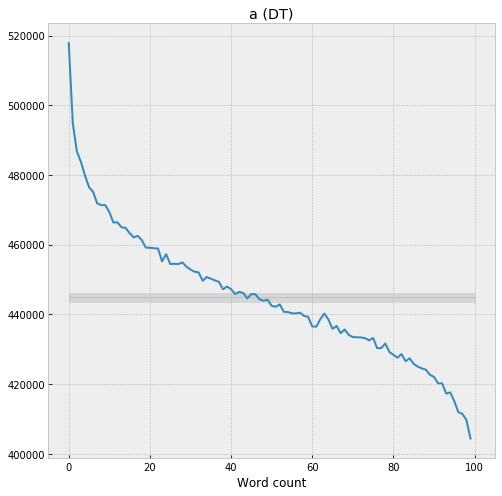

In [21]:
plot_token('a', 'DT')